# WeatherPy
----

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import csv

# Import API key
from config import weather_api_key

print(weather_api_key)

35d78ed5f8ae8aa8742cb15eafeb550b


In [2]:
# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

600

### Perform API Calls


In [4]:
# Open Weather API Call
url = "http://api.openweathermap.org/data/2.5/weather?units=imperial&appid=" + weather_api_key

# Begin Process Printing Statement
print("Beginning Data Retrieval     ")
print("-----------------------------")

# list City Weather Data
city_data = []

# Create counters
r_count = 1
s_count = 1


# Loop through each city to grab data
for i, city in enumerate(cities):
    
    # Grouping cities in the cities list
    if (i % 50 == 0 and i >= 50):
        r_count = 0
        s_count += 1
        time.sleep(30)
    
    # Create URL for Each City
    city_url = url + "&q="  + city
    
    # Processing Print Statement
    print("Processing Record %s of Set %s | %s" % (r_count, s_count, city))

    # Add 1 to the record count
    r_count += 1

     # Use try to skip any cities that may be too small to request
    try:
        
         #  response = requests.get(query_url + city).json()
        response = requests.get(city_url).json()

         # Extract Max Temp, Humidity, Cloudiness, Wind Speed, Country, Date 
        city_lat = response["coord"]["lat"]
        city_lng = response["coord"]["lon"]
        city_maxtemp = response["main"]["temp_max"]
        city_humid = response["main"]["humidity"]
        city_cloudy = response["clouds"]["all"]
        city_wind = response["wind"]["speed"]
        city_country = response["sys"]["country"]
        city_date = response["dt"]

        # Append into City Data List
        city_data.append({
            "City": city,
            "Lat": city_lat,
            "Lng": city_lng,
            "Max Temp": city_maxtemp,
            "Humidity": city_humid,
            "Cloudiness": city_cloudy,
            "Wind Speed": city_wind,
            "Country": city_country,
            "Date": city_date

        })

    except:
        print("City Not Found. Skipping...")
        pass
    
# Print Data Retrieval Complete Statement
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")


Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | nanortalik
Processing Record 2 of Set 1 | muros
Processing Record 3 of Set 1 | barentsburg
City Not Found. Skipping...
Processing Record 4 of Set 1 | samalaeulu
City Not Found. Skipping...
Processing Record 5 of Set 1 | mataura
Processing Record 6 of Set 1 | alugan
Processing Record 7 of Set 1 | tamandare
Processing Record 8 of Set 1 | rikitea
Processing Record 9 of Set 1 | albany
Processing Record 10 of Set 1 | zhigansk
Processing Record 11 of Set 1 | puerto ayora
Processing Record 12 of Set 1 | pevek
Processing Record 13 of Set 1 | dikson
Processing Record 14 of Set 1 | innisfail
Processing Record 15 of Set 1 | georgetown
Processing Record 16 of Set 1 | luderitz
Processing Record 17 of Set 1 | saldanha
Processing Record 18 of Set 1 | falealupo
City Not Found. Skipping...
Processing Record 19 of Set 1 | tarauaca
Processing Record 20 of Set 1 | provideniya
Processing Record 21 of Set 1 | cidreira

Processing Record 35 of Set 4 | klaksvik
Processing Record 36 of Set 4 | kruisfontein
Processing Record 37 of Set 4 | alekseyevka
Processing Record 38 of Set 4 | severo-kurilsk
Processing Record 39 of Set 4 | palabuhanratu
City Not Found. Skipping...
Processing Record 40 of Set 4 | faya
Processing Record 41 of Set 4 | asau
Processing Record 42 of Set 4 | sao jose da coroa grande
Processing Record 43 of Set 4 | necochea
Processing Record 44 of Set 4 | santiago de compostela
Processing Record 45 of Set 4 | trairi
Processing Record 46 of Set 4 | cape town
Processing Record 47 of Set 4 | grand gaube
Processing Record 48 of Set 4 | kedrovyy
Processing Record 49 of Set 4 | axim
Processing Record 0 of Set 5 | arman
Processing Record 1 of Set 5 | kichmengskiy gorodok
Processing Record 2 of Set 5 | longyearbyen
Processing Record 3 of Set 5 | waterloo
Processing Record 4 of Set 5 | shingu
Processing Record 5 of Set 5 | ponta do sol
Processing Record 6 of Set 5 | sentyabrskiy
City Not Found. Skip

Processing Record 23 of Set 8 | seabra
Processing Record 24 of Set 8 | mayo
Processing Record 25 of Set 8 | sosnovo-ozerskoye
Processing Record 26 of Set 8 | baicheng
Processing Record 27 of Set 8 | tazovskiy
Processing Record 28 of Set 8 | airai
Processing Record 29 of Set 8 | nisia floresta
Processing Record 30 of Set 8 | barbastro
Processing Record 31 of Set 8 | brownsville
Processing Record 32 of Set 8 | torbay
Processing Record 33 of Set 8 | hurghada
Processing Record 34 of Set 8 | mbini
Processing Record 35 of Set 8 | batemans bay
Processing Record 36 of Set 8 | lokosovo
Processing Record 37 of Set 8 | tasbuget
City Not Found. Skipping...
Processing Record 38 of Set 8 | fort-shevchenko
Processing Record 39 of Set 8 | sinkat
City Not Found. Skipping...
Processing Record 40 of Set 8 | margate
Processing Record 41 of Set 8 | melendugno
Processing Record 42 of Set 8 | victoria
Processing Record 43 of Set 8 | oktyabrskiy
Processing Record 44 of Set 8 | richards bay
Processing Record 4

Processing Record 14 of Set 12 | allende
Processing Record 15 of Set 12 | eston
Processing Record 16 of Set 12 | port augusta
Processing Record 17 of Set 12 | sorland
Processing Record 18 of Set 12 | kahului
Processing Record 19 of Set 12 | linjiang
Processing Record 20 of Set 12 | barreirinha
Processing Record 21 of Set 12 | bairiki
Processing Record 22 of Set 12 | jasper
Processing Record 23 of Set 12 | kununurra
Processing Record 24 of Set 12 | hebron
Processing Record 25 of Set 12 | shelburne
Processing Record 26 of Set 12 | kendari
Processing Record 27 of Set 12 | wasilla
Processing Record 28 of Set 12 | ust-nera
Processing Record 29 of Set 12 | khani
Processing Record 30 of Set 12 | solovetskiy
City Not Found. Skipping...
Processing Record 31 of Set 12 | arlit
Processing Record 32 of Set 12 | ketchikan
Processing Record 33 of Set 12 | poya
Processing Record 34 of Set 12 | hofn
Processing Record 35 of Set 12 | limbang
Processing Record 36 of Set 12 | angoche
Processing Record 37 o

### Convert Raw Data to DataFrame

In [5]:
# Create a new dictionary for data
to_csv = city_data

keys = to_csv[0].keys()

with open('output/city_data.csv', 'w', newline='') as output_file:
    dict_writer = csv.DictWriter(output_file, keys)
    dict_writer.writeheader()
    dict_writer.writerows(to_csv)

In [2]:
cities_df = pd.read_csv('output/city_data.csv')
cities_df

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,nanortalik,60.1432,-45.2371,35.87,94,100,17.78,GL,1639882167
1,muros,42.7762,-9.0603,51.24,92,19,6.02,ES,1639882167
2,mataura,-46.1927,168.8643,74.68,44,91,12.48,NZ,1639882168
3,alugan,12.2188,125.4808,81.88,85,100,9.26,PH,1639882168
4,tamandare,-8.7597,-35.1047,77.85,79,70,8.28,BR,1639882168
...,...,...,...,...,...,...,...,...,...
544,gilbues,-9.8317,-45.3439,76.87,65,100,2.04,BR,1639882643
545,cockburn town,21.4612,-71.1419,79.83,65,1,22.84,TC,1639882644
546,ravar,31.2656,56.8055,55.76,36,85,4.92,IR,1639882644
547,murgab,37.4966,61.9714,53.47,37,90,6.91,TM,1639882644


## Inspect the data and remove the cities where the humidity > 100%.

In [7]:
humidity_city = cities_df.loc[cities_df["Humidity"] > 100]
humidity_city

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date


In [ ]:
#  Get the indices of cities that have humidity over 100%.


In [ ]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


## Plotting the Data

## Latitude vs. Temperature Plot

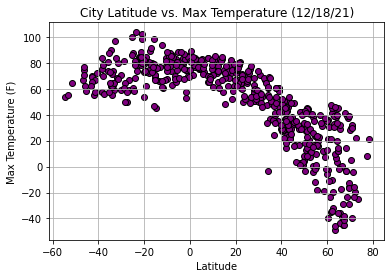

In [8]:
# Plot Data
x_values = cities_df["Lat"]
y_values = cities_df["Max Temp"]
plt.scatter(x_values, y_values, marker = "o", facecolors = "purple", edgecolors = "black")

# Create Plot Labels
plt.title("City Latitude vs. Max Temperature (%s)" % time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

plt.savefig("output/ Fig1.png")

## Latitude vs. Humidity Plot

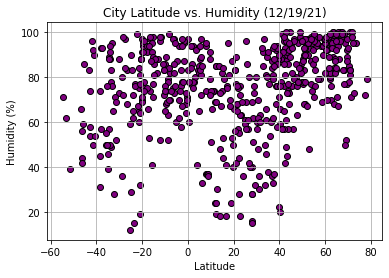

In [5]:
# Plot Data
x_values = cities_df["Lat"]
y_values = cities_df["Humidity"]
plt.scatter(x_values, y_values, marker = "o", facecolors = "purple", edgecolors = "black")

# Create Plot Labels
plt.title("City Latitude vs. Humidity (%s)" % time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

plt.savefig("output/ Fig2.png")

## Latitude vs. Cloudiness Plot

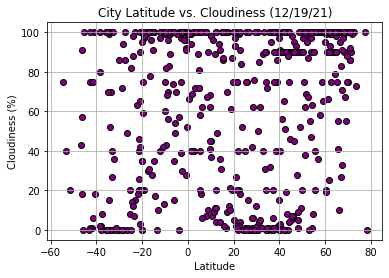

In [6]:
# Plot Data
x_values = cities_df["Lat"]
y_values = cities_df["Cloudiness"]
plt.scatter(x_values, y_values, marker = "o", facecolors = "purple", edgecolors = "black")

# Create Plot Labels
plt.title("City Latitude vs. Cloudiness (%s)" % time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

plt.savefig("output/ Fig3.png")

## Latitude vs. Wind Speed Plot

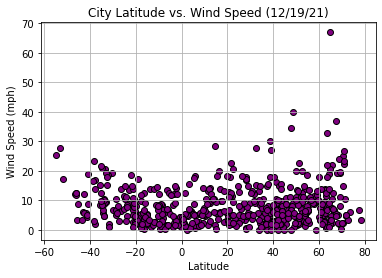

In [7]:
# Plot Data
x_values = cities_df["Lat"]
y_values = cities_df["Wind Speed"]
plt.scatter(x_values, y_values, marker = "o", facecolors = "purple", edgecolors = "black")

# Create Plot Labels
plt.title("City Latitude vs. Wind Speed (%s)" % time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

plt.savefig("output/ Fig4.png")

## Linear Regression

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

In [12]:
nh_cities_df = cities_df.loc[cities_df["Lat"] >= 0]
sh_cities_df = cities_df.loc[cities_df["Lat"] <= 0]

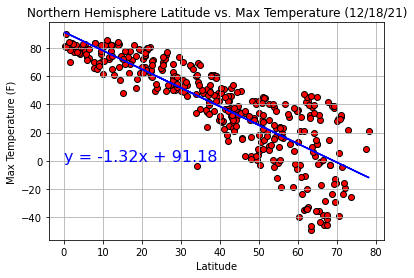

In [13]:
# Create Variables
x_values = nh_cities_df["Lat"]
y_values = nh_cities_df["Max Temp"]

# Create Line Regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot Data
plt.scatter(x_values, y_values, marker = "o", facecolors = "red", edgecolors = "black")
plt.plot(x_values,regress_values, color = "blue")

# Create Plot Labels and Annotation
plt.annotate(line_eq, (0,0), fontsize=16, color = "blue")
plt.title("Northern Hemisphere Latitude vs. Max Temperature (%s)" % time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

plt.savefig("output/ Fig5.png")

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

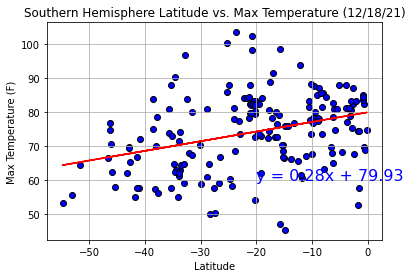

In [14]:
# Create Variables
x_values = sh_cities_df["Lat"]
y_values = sh_cities_df["Max Temp"]

# Create Line Regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot Data
plt.scatter(x_values, y_values, marker = "o", facecolors = "blue", edgecolors = "black")
plt.plot(x_values,regress_values, color = "red")

# Create Plot Labels and Annotation
plt.annotate(line_eq, (-20,60), fontsize=16, color = "blue")
plt.title("Southern Hemisphere Latitude vs. Max Temperature (%s)" % time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

plt.savefig("output/ Fig6.png")

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

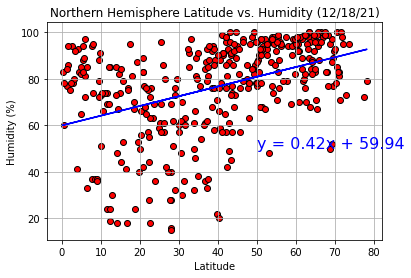

In [15]:
# Create Variables
x_values = nh_cities_df["Lat"]
y_values = nh_cities_df["Humidity"]

# Create Line Regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot Data
plt.scatter(x_values, y_values, marker = "o", facecolors = "red", edgecolors = "black")
plt.plot(x_values,regress_values, color = "blue")

# Create Plot Labels and Annotation
plt.annotate(line_eq, (50,50), fontsize=16, color = "blue")
plt.title("Northern Hemisphere Latitude vs. Humidity (%s)" % time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

plt.savefig("output/ Fig7.png")

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

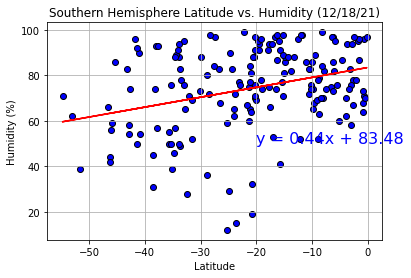

In [16]:
# Create Variables
x_values = sh_cities_df["Lat"]
y_values = sh_cities_df["Humidity"]

# Create Line Regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot Data
plt.scatter(x_values, y_values, marker = "o", facecolors = "blue", edgecolors = "black")
plt.plot(x_values,regress_values, color = "red")

# Create Plot Labels and Annotation
plt.annotate(line_eq, (-20,50), fontsize=16, color = "blue")
plt.title("Southern Hemisphere Latitude vs. Humidity (%s)" % time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

plt.savefig("output/ Fig8.png")

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

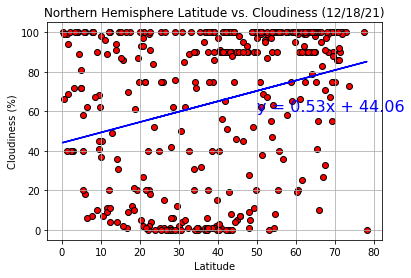

In [17]:
# Create Variables
x_values = nh_cities_df["Lat"]
y_values = nh_cities_df["Cloudiness"]

# Create Line Regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot Data
plt.scatter(x_values, y_values, marker = "o", facecolors = "red", edgecolors = "black")
plt.plot(x_values,regress_values, color = "blue")

# Create Plot Labels and Annotation
plt.annotate(line_eq, (50,60), fontsize=16, color = "blue")
plt.title("Northern Hemisphere Latitude vs. Cloudiness (%s)" % time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

plt.savefig("output/ Fig9.png")

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

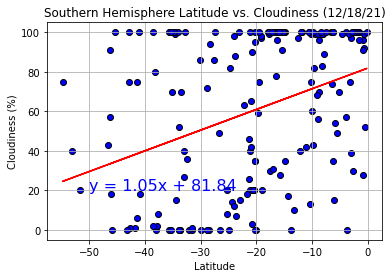

In [18]:
# Create Variables
x_values = sh_cities_df["Lat"]
y_values = sh_cities_df["Cloudiness"]

# Create Line Regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot Data
plt.scatter(x_values, y_values, marker = "o", facecolors = "blue", edgecolors = "black")
plt.plot(x_values,regress_values, color = "red")

# Create Plot Labels and Annotation
plt.annotate(line_eq, (-50,20), fontsize=16, color = "blue")
plt.title("Southern Hemisphere Latitude vs. Cloudiness (%s)" % time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

plt.savefig("output/ Fig10.png")

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

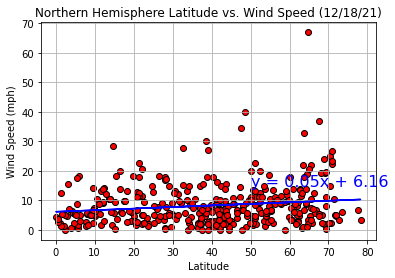

In [19]:
# Create Variables
x_values = nh_cities_df["Lat"]
y_values = nh_cities_df["Wind Speed"]

# Create Line Regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot Data
plt.scatter(x_values, y_values, marker = "o", facecolors = "red", edgecolors = "black")
plt.plot(x_values,regress_values, color = "blue")

# Create Plot Labels and Annotation
plt.annotate(line_eq, (50,15), fontsize=16, color = "blue")
plt.title("Northern Hemisphere Latitude vs. Wind Speed (%s)" % time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

plt.savefig("output/ Fig11.png")

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

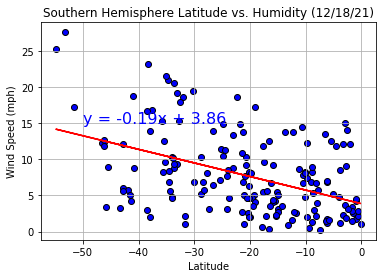

In [20]:
# Create Variables
x_values = sh_cities_df["Lat"]
y_values = sh_cities_df["Wind Speed"]

# Create Line Regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot Data
plt.scatter(x_values, y_values, marker = "o", facecolors = "blue", edgecolors = "black")
plt.plot(x_values,regress_values, color = "red")

# Create Plot Labels and Annotation
plt.annotate(line_eq, (-50,15), fontsize=16, color = "blue")
plt.title("Southern Hemisphere Latitude vs. Humidity (%s)" % time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

plt.savefig("output/ Fig12.png")